Basic CNOT circuit

In [136]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,c)
#circuit.x(q[0])
#circuit.x(q[1])
circuit.h([q[0],q[1]])
circuit.x(q[3])
#circuit.h(q[1])
circuit.ccx(q[0],q[1],q[2])
circuit.cx(q[2],q[3])
circuit.h([q[0],q[1]])
#circuit.cy(q[2],q[3])
circuit.measure(q,c)

In [5]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

q = QuantumRegister(5)
c = ClassicalRegister(5)
circuit = QuantumCircuit(q,c)
#circuit.x(q[0])
#circuit.x(q[1])
circuit.h([q[0],q[1]])
circuit.x(q[3])
#circuit.h(q[1])
circuit.ccx(q[0],q[1],q[2])
circuit.ccx(q[2],q[4],q[3])
circuit.h([q[0],q[1]])
#circuit.cy(q[2],q[3])
circuit.measure(q,c)

In [6]:
circuit.draw()

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 10, 25, 0, 5, 59, 446259), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='4dd5f7c3-5977-441a-9e36-0e992d541728', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0001929}, qobj_id='ea266755-b133-4db8-a4e3-bb4c494d10e0', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x8=1), statevector=[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]), header=Obj(clbit_labels=[['c1', 0], ['c1', 1], ['c1', 2], ['c1', 3], ['c1', 4]], creg_sizes=[['c1', 5]], memory_slots=5, n_qubits=5, name='circuit3', qreg_sizes=[['q1', 5]], qubit_labels=[['q1', 0], ['q1', 1], ['q1', 2], ['q1', 3], ['q1', 4]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=1513971013, shots=1, status='DONE', success=T

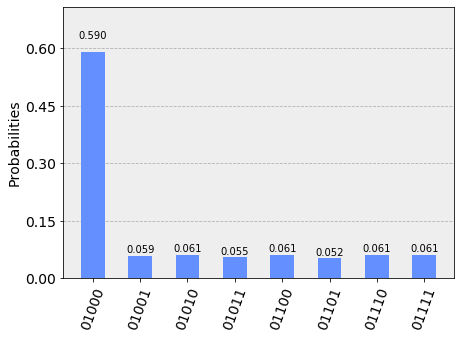

In [7]:
simulator = Aer.get_backend('qasm_simulator')
backend = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator, shots=1000)
job1 = execute(circuit, backend, shots=1000)

result = job.result()
result1 = job1.result()

print(result1)
counts = result.get_counts(circuit)
print("\nTotal count are:",counts)
plot_histogram(counts)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


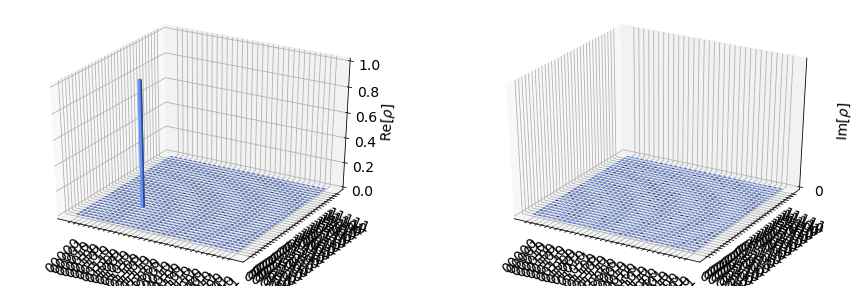

In [8]:
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)